# TPC2 - Sistemas de Equações Diferenciais e Algébricas

<ul>
    <li>Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio. </li>
    <li>Deve entregar ESTE Notebook de Jupyter.</li>
    <li>O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. </li>
    <li>Não deve acrescentar ou apagar nenhuma célula. </li>
    <li>Todas as explicações devem ser claras e concisas. </li>
    <li>É preferível fazer menos e fazer bem que muito e mal. </li>
    <li>O método @jit(nopython=True) do pacote numba pode diminuir o tempo de cálculo.</li>
    <li>A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.</li>
</ul>

# Introdução

Considere a linha de transmissão RLC da Figura, onde se quer analisar a voltagem, $V_{n}(t)$, em cada nodo $n\!=\!1,\!\cdots\!,N$ indicado no esquema. As resistências, indutâncias e capacidades na cadeia são todas iguais (respectivamente $R$, $L$ e $C$), tal que a evolução da voltagem em cada nodo é solução das seguintes equações lineares:

$$
LC\frac{d^{2}}{dt^{2}}V_{n}\left(t\right)\!+\!RC\frac{d}{dt}V_{n}\left(t\right)\!-\!V_{n+1}\left(t\right)\!-\!V_{n-1}\left(t\right)\!+\!2V_{n}\left(t\right)\!=\!0.
$$

<p float="left">
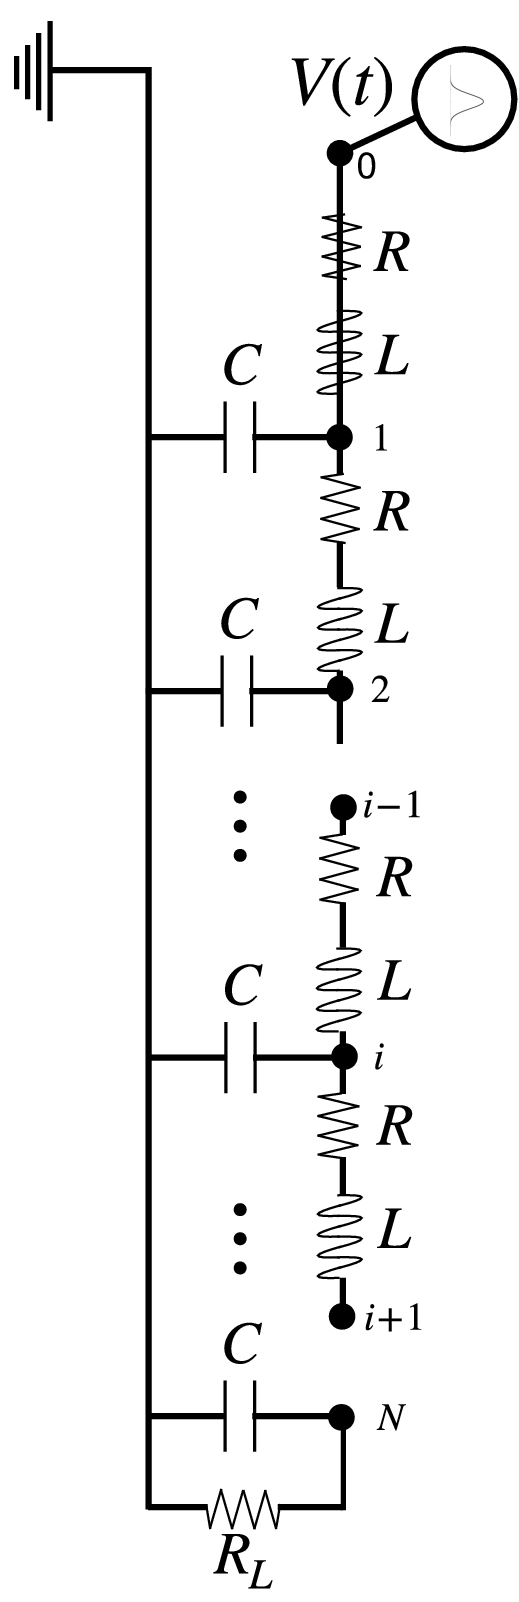
</p>

O nodo $n\!=\!0$ é forçado por uma voltagem externa dependente do tempo, $V_{0}\left(t\right)=V_{0}f(t)$, onde $f(t)$ é uma função arbitrária do tempo e $V_{0}$ é uma unidade de voltagem. Por fim, o nodo $n\!=\!N$ encontra-se ligado à terra através de uma resistência de carga, $R_{\text{L}}\!\neq\!R$ e um condensador, em paralelo. Assim sendo, a equação dinâmica para $V_{N}(t)$ tem uma forma ligeiramente diferente:

$$
LC\frac{d^{2}}{dt^{2}}\!V_{N}\!\left(t\right)\!+\!\left(\!RC\!+\!\frac{L}{R_{\text{L}}}\!\right)\frac{d}{dt}\!V_{N}\!\left(t\right)\!+\!\left(\!1\!+\!\frac{R}{R_{\text{L}}}\!\right)\!V_{N}\!\left(t\right)\!-\!V_{N-1}\!\left(t\right)	\!=\!0
$$


In [1]:
# Introduza o codigo geral aqui

import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
import scipy.linalg as sp
from scipy import integrate

# 1. Análise no Domínio das Frequências
1. Medindo o tempo em unidades de $\sqrt{LC}$, as resistências em unidades de $R_{\text{L}}$ e as voltagens em unidades de $V_{0}$, adimensionalize o sistema de equações anterior, obtendo.
$$
\begin{cases}
\frac{d^{2}}{d\tau^{2}}v_{1}\!\left(\tau\right)\!+\!\gamma\frac{d}{d\tau}\!v_{1}\!\left(\tau\right)\!-\!v_{2}\!\left(\tau\right)\!+\!2v_{1}\!\left(\tau\right)\!=\!f(\tau)\\
\frac{d^{2}}{d\tau^{2}}v_{n}\!\left(\tau\right)\!+\!\gamma\frac{d}{d\tau}\!v_{n}\!\left(\tau\right)\!-\!v_{n+1}\!\left(\tau\right)\!-\!v_{n-1}\!\left(\tau\right)\!+\!2v_{n}\!\left(\tau\right)\!=\!0 & 1\!<\!n\!<\!N\\
\frac{d^{2}}{d\tau^{2}}v_{N}\!\left(\tau\right)\!+\!\left(\frac{r}{\gamma}\!+\!\gamma\right)\frac{d}{d\tau}\!v_{N}\!\left(\tau\right)\!+\!\left(1\!+\!r\right)v_{N}\!\left(\tau\right)\!-\!v_{N-1}\!\left(\tau\right)\!=\!0
\end{cases}
$$
Determine os parâmetros adimensionais $\gamma$ e $r$.


#Responda Aqui

Temos o sistema de equações:
$$
\begin{equation} \begin{cases} LC \frac{d^2}{dt^2}V_1(t) + RC\frac{d}{dt}V_1(t) + 2V_1(t) - V_2(t) = V_0(t) \\ LC \frac{d^2}{dt^2}V_n(t) + RC\frac{d}{dt}V_n(t) + 2V_1(t) - V_{n-1}(t) - V_{n+1}(t) = 0  \qquad \qquad 1 < n <N\\ LC \frac{d^2}{dt^2}V_N(t) + (RC + \frac{L}{R_L})\frac{d}{dt}V_N(t) + (1+\frac{R}{R_L})V_N(t) - V_{N-1}(t) = 0 \end{cases} \end{equation}
$$
<br>
Tenha-se em conta:
$$
v_n(t) = \frac{V_n(t)}{V_0} \qquad ; \qquad \tau = \frac{t}{\sqrt{LC}}
$$
Fazendo a mudança de variável $t \rightarrow \tau$ tem-se:
$$
v_n(\sqrt{LC}\tau) = v_n(\tau) \qquad ; \qquad \frac{d}{dt}v_n(\tau) = \frac{1}{\sqrt{LC}}\frac{d}{d\tau}v_n(\tau)  \qquad ; \qquad \frac{d^2}{dt^2}v_n(\tau) = \frac{1}{LC}\frac{d^2}{d\tau^2}v_n(\tau)
$$
Substituindo no sistema de equações 
$$
\begin{cases}
\frac{d^{2}}{d\tau^{2}}v_{1}\!\left(\tau\right)\!+\!R\sqrt{\frac{C}{L}}\frac{d}{d\tau}\!v_{1}\!\left(\tau\right)\!-\!v_{2}\!\left(\tau\right)\!+\!2v_{1}\!\left(\tau\right)\!=\!f(\tau)\\
\frac{d^{2}}{d\tau^{2}}v_{n}\!\left(\tau\right)\!+\!R\sqrt{\frac{C}{L}}\frac{d}{d\tau}\!v_{n}\!\left(\tau\right)\!-\!v_{n+1}\!\left(\tau\right)\!-\!v_{n-1}\!\left(\tau\right)\!+\!2v_{n}\!\left(\tau\right)\!=\!0 & 1\!<\!n\!<\!N\\
\frac{d^{2}}{d\tau^{2}}v_{N}\!\left(\tau\right)\!+\!\left(\frac{1}{R_L}\sqrt{\frac{L}{C}}\!+\!R\sqrt{\frac{C}{L}}\right)\frac{d}{d\tau}\!v_{N}\!\left(\tau\right)\!+\!\left(1\!+\!\frac{R}{R_L}\right)v_{N}\!\left(\tau\right)\!-\!v_{N-1}\!\left(\tau\right)\!=\!0
\end{cases}
$$




$$r = \frac{R}{R_L}$$
<br>
$$\gamma = R\sqrt{\frac{C}{L}} = rR_L\sqrt{\frac{C}{L}}$$

In [2]:
# Responda Aqui

2. Tomando uma representação de $v_{n}\!\!\left(\tau\right)$ e $f(\tau)$ no espaço das frequências,
$$
v_{n}\left(\tau\right)\!=\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!d\omega v_{n}^{\omega}e^{i\omega\tau}\quad\text{e}\quad f\left(\tau\right)\!=\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!d\omega F^{\omega}e^{i\omega\tau},
$$

o sistema linear de ODEs transforma-se num sistema algébrico, parametrizado por $\omega$:

$$
\begin{cases}
\left(-\omega^{2}+i\gamma\omega+2\right)v_{1}^{\omega}-v_{2}^{\omega}=F^{\omega}\\
\left(-\omega^{2}+i\gamma\omega+2\right)v_{n}^{\omega}-v_{n+1}^{\omega}-v_{n-1}^{\omega}=0, & 1<n<N\\
\left(-\omega^{2}+i\left(\frac{r}{\gamma}+\gamma\right)\omega+1+r\right)v_{N}^{\omega}\left(\tau\right)-v_{N-1}^{\omega}=0
\end{cases}.
$$
Se $F^{\omega}\!\neq\!0$ a resposta do sistema no nodo $n$ é determinada pela função de resposta do sistema, $h_{n}^{\omega}=v_{n}^{\omega}/F^{\omega}$, determinada a partir de

$$
\begin{cases}
\left(-\omega^{2}+i\gamma\omega+2\right)h_{1}^{\omega}-h_{2}^{\omega}=1\\
\left(-\omega^{2}+i\gamma\omega+2\right)h_{n}^{\omega}-h_{n+1}^{\omega}-h_{n-1}^{\omega}=0, & 1<n<N\\
\left(-\omega^{2}+i\left(\frac{r}{\gamma}+\gamma\right)\omega+r+1\right)h_{N}^{\omega}-h_{N-1}^{\omega}=0
\end{cases}.
$$
O sistema é agora uma equação matricial, $\mathbb{M}_{\omega}\!\cdot\!\mathbf{h}_{\omega}\!=\!\mathbf{e}_{0}$, onde $\mathbf{h}=\left[h_{1}^{\omega},h_{2}^{\omega},\cdots,h_{N}^{\omega}\right]^{T}$ e $\mathbf{e}_{0}\!=\![1,0,\cdots,0]^{T}$. Escreva duas funções $\texttt{Python}$ que determinem a matriz $\mathbb{M}_{\omega}$ em forma densa e esparsa, recebendo $N$ e $\omega$ como parâmetro.

#Responda Aqui

In [3]:
# Responda Aqui

# Constrói uma matriz densa
def m_dense(w, n, gamma, r):
    
    # Diagonal
    m0 = np.zeros([n, n], complex)
    aux = np.ones(n, complex) * (-(w ** 2) + 1j * gamma * w + 2)
    aux[-1] = -(w**2) + 1j * (r / gamma + gamma) * w + 1 + r
    np.fill_diagonal(m0, aux)
    
    # Subdiagonais
    m0 = m0 + np.eye(n, n, -1) * (-1) + np.eye(n, n, 1) * (-1)

    return m0


# Constrói uma matriz esparsa
def m_sparse(w, n, gamma, r):
    m0 = np.zeros([3, n], complex)
    
    # Diagonal
    aux = np.ones(n, complex) * (-(w ** 2) + 1j * gamma * w + 2)
    aux[-1] = -(w ** 2) + 1j * (r / gamma + gamma) * w + 1 + r
    m0[1] = aux
    
    # Subdiagonais
    m0[0, 1:] = -1
    m0[2, :-1] = -1
    return m0


# Altera a diagonal de uma matriz esparsa --> eficiência nos programas seguintes
def alter_m_sparse(w, matrix, gamma, r):
    # Considera que uma matriz com 1's na linha superior e na inferior. Altera a diagonal
    aux = np.ones(matrix.shape[1], complex) * (-(w ** 2) + 1j * gamma * w + 2)
    aux[-1] = -(w ** 2) + 1j * (r / gamma + gamma) * w + 1 + r
    matrix[1] = aux

3. No caso em que $\gamma,r\to0$ e $F^{\omega}=0$, a equação anterior reduz-se a uma equação de valores próprios,
$$
\begin{cases}
2v_{1}^{\omega}-v_{2}^{\omega}=\omega^{2}v_{1}^{\omega}\\
2v_{n}^{\omega}-v_{n+1}^{\omega}-v_{n-1}^{\omega}=\omega^{2}v_{n}^{\omega}, & 1<n<N\\
v_{N}^{\omega}-v_{N-1}^{\omega}=\omega^{2}v_{N}^{\omega}
\end{cases}, 
$$
em que $\omega$ são as frequências próprias da linha.

(a) A $N$ fixo, escreva uma função que determine as frequências próprias usando o algoritmo $QR$ baseado na decomposição de Householder. [Sugestão: Imponha uma tolerância de $10^{-5}$ para a convergência da diagonalização].

#Responda Aqui

In [4]:
# Responda Aqui

# Constrói a matriz que representa o sistema de equações em cima apresentado
def m_exercise3(n):
    m0 = np.eye(n, n, 0, float) * 2 + np.eye(n, n, -1, float) * (-1) + np.eye(n, n, 1, float) * (-1)
    m0[-1, -1] = 1
    return m0

# Rotina householder
def householder_elim(q, a, i_min):   # Função auxiliar
    N = len(a[:, 0]) - i_min
    e0_v = np.zeros(N); e0_v[0] = 1
    u_v = np.ndarray.copy(a[i_min:, i_min])
    u_v += np.sqrt(u_v @ u_v) * e0_v
    u_v /= np.sqrt(u_v @ u_v)
    a[i_min:, i_min:] -= 2 * np.outer(u_v, np.dot(u_v, a[i_min:, i_min:]))
    q[:, i_min:] -= 2 * np.outer(q[:, i_min:] @ u_v, u_v)


def householder_qr(a):   #Função a chamar
    n = len(a[:, 0])
    r = np.ndarray.copy(a)
    q = np.eye(n)
    for i in range(n-1):
        householder_elim(q, r, i)
    return q, r


# Determina os valores próprios segundo a decomposição de householder
def eigen_values(a, p):
    a1 = np.ndarray.copy(a)
    n = len(a)
    erro = 1
#     precision_reached = False

#     while not precision_reached:
    while erro > p:
        q, r = householder_qr(a1)
        a1 = r @ q
        erro = np.max(abs(a1[~np.eye(n, dtype=bool)]))
#         precision_reached = not (False in (abs(a1[~np.eye(n, dtype=bool)]) < p))

    return np.diag(a1)

(b) Considere $N\!=\!16,32,64$ e determine todos os $\omega$s próprios do sistema. Mostre que estas frequências estão limitadas superiormente (indique o limite) e descreva qual o efeito de aumentar o número de nodos.

#Responda Aqui

Pelos gráficos  apresentados é possível verificar que as frequências estão superiormente limitadas pelo valor 2. Este valor vai de acordo com o resultado de N osciladores acoplados:

$$
\omega_n = 2 \omega_0 \ \sin \left[ \frac{n \pi}{2(N+1)} \right]
$$

O aumento do número de nodos aumenta a densidade de pontos (frequências próprias) no intervalo $]0, 2[$. Este efeito também é previsto pela equação apresentada.

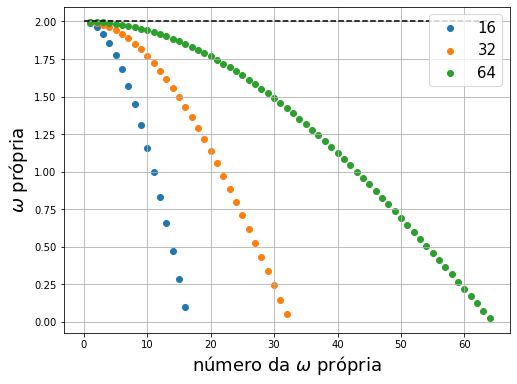

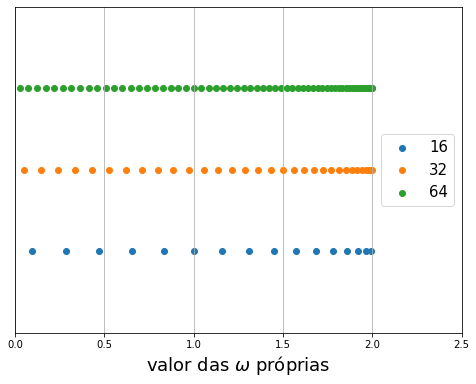

In [5]:
# Responda Aqui

values_16 = np.sqrt(eigen_values(m_exercise3(16), 1e-5))
values_32 = np.sqrt(eigen_values(m_exercise3(32), 1e-5))
values_64 = np.sqrt(eigen_values(m_exercise3(64), 1e-5))

plt.figure(figsize=(8,6))
plt.xlabel(r"número da $\omega$ própria", fontsize=18)
plt.ylabel(r"$\omega$ própria", fontsize=18)
plt.grid()
plt.scatter(np.arange(1,17), values_16, label="16")
plt.scatter(np.arange(1,33), values_32, label="32")
plt.scatter(np.arange(1,65), values_64, label="64")
plt.legend(fontsize = 15)
plt.hlines(2, 0, 64, linestyles="dashed", color="k")
plt.show()

figura1 = plt.figure(figsize=(8,6))
eixos1 = plt.axes()
plt.scatter(values_16, np.ones(16)*0.5, label="16")
plt.scatter(values_32, np.ones(32), label="32")
plt.scatter(values_64, np.ones(64)*1.5, label="64")
eixos1.axes.get_yaxis().set_visible(False)
plt.legend(loc = 'right', fontsize=15)
plt.xlabel(r"valor das $\omega$ próprias", fontsize=18)
plt.grid()
plt.xlim(0, 2.5)
plt.ylim(0, 2)
plt.show()

4. Considere agora $N\!\!=\!64$, $\gamma,\!r\!\neq\!0$. Escreva uma função que resolva a Eq.[1.6] para $\omega\!\in\![-1.5,\!1.5]$ , numa malha uniforme de $10^{5}$ pontos. Use o método $\mathtt{scipy.linalg.solve\text{\_}banded()}$ e retorne $h_{N}^{\omega}$.

(a) No mesmo gráfico, represente $\left|h_{N}^{\omega}\right|$ como função de $\omega$ para $(\gamma,r)\!=\!\{(10^{-5}\!,10^{-7});(10^{-3},10^{-5});(10^{-2},10^{-4});$ $(10^{-4},10^{-3});(10^{-2},10^{-1})\}$. [Sugestão: Use uma escala logarítmica na vertical.]

#Responda Aqui

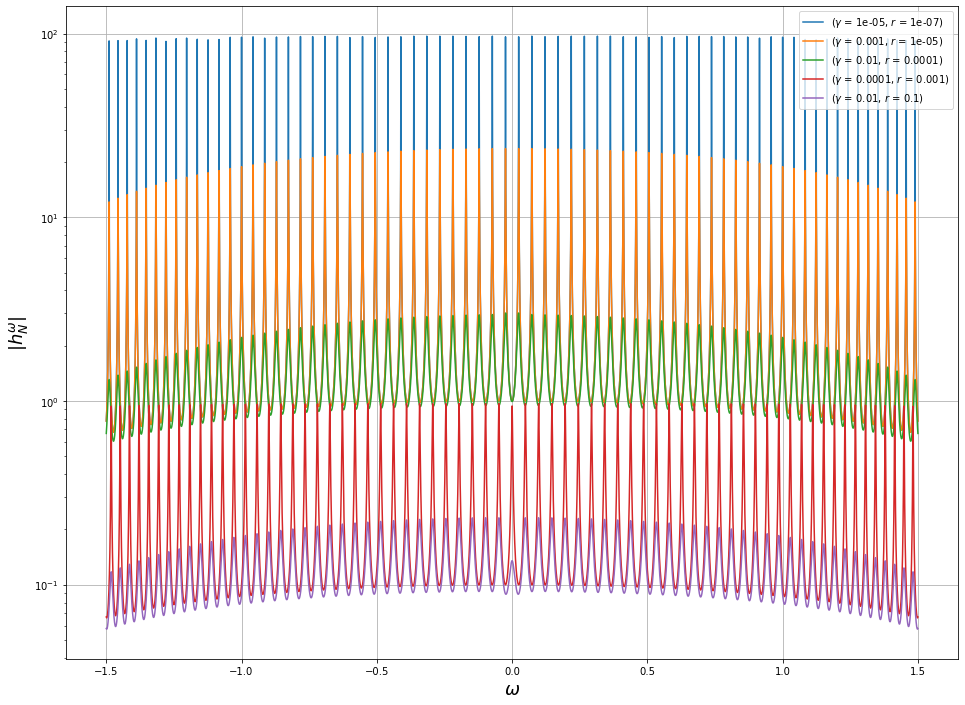

In [6]:
# Responda Aqui

w_list = np.linspace(-1.5, 1.5, 50000)   # Array com as frequências
save_hn = []   # lista para guardas os valores de h para correr o programa só 1 vez
gamma_r = [(1e-5, 1e-7), (1e-3, 1e-5), (1e-2, 1e-4), (1e-4, 1e-3), (1e-2, 1e-1)]   # Lista com os valores de gamma e r, respetivamente.
plt.figure(figsize=(16,12))
plt.grid()
plt.xlabel(r"$\omega$", fontsize=18)
plt.ylabel(r"|$h_{N}^{\omega}$|", fontsize=18)


def make_plot(gamma, r):
    hn_list = np.empty(50000, float)   # criar array para criar os valores de módulo de h
    m0 = np.ones([3, 64], complex) * -1  # criar matriz para usar na alter_m_sparse
    b = np.zeros(64, float)   # definir o vetor b
    b[0] = 1
    for i, ele in enumerate(w_list):
        alter_m_sparse(ele, m0, gamma, r)   # constrói a matriz esparsa
        h_list = sp.solve_banded((1, 1), m0, b)   # resolve o sistema
        hn_list[i] = abs(h_list[63])   # absoluto da última linha
    save_hn.append(hn_list)   # guardar os valores de h
    plt.plot(w_list, hn_list, label=r"($\gamma$ = {}, $r$ = {})".format(gamma, r))   #plot do gráfico


# Faz o plot para todos os valores de gamma e r a ser estudados
for ele in gamma_r:
    make_plot(ele[0], ele[1])

plt.yscale("log")
plt.legend()
plt.show()

(b) No gráfico anterior inclua linhas verticais nas primeiras 20 frequências próprias do sistema sem dissipação. Comente o que observa e explique as diferenças entre os gráficos.

#Responda Aqui

Para $\frac{r}{\gamma} << 1$ (azul, laranja e verde), as frequências próprias coincidem com os picos máximos de $|h_N^\omega|$. Este comportamento é explicado porque a frequência de oscilação para o nodo 64 é aproximadamente a frequência natural quando $\frac{r}{\gamma} << 1$.

Contudo, para $\frac{r}{\gamma} > 1$ (vermelho e roxo) já se observa um comportamento diferente. As frequências próprias coincidem com os mínimos para $\omega$ baixas, mas depois isto deixa de acontecer.

Uma explicação pode tentar ser encontrada a partir da análise de condições fronteira. No 1º caso tem-se uma analogia a uma condição fronteira aberta, enquanto que na 2ª tem-se uma condição fronteira refletora. Analise-se o parâmetro $\frac{r}{\gamma}$;
$$
\frac{r}{\gamma} = \frac{1}{R_L} \sqrt{\frac{L}{C}}
$$
Considerando $L$ e $C$ fixos, tem-se que a valores pequenos de $\frac{r}{\gamma}$ correspondem valores grandes de $R_L$. Assim, pode-se desprezar o ramo onde $R_L$ se encontra, ou seja, assume-se que toda a corrente passa pelo condensador. Estas condições foram as assumidas para o cálculo das frequências próprias, daí haver uma coincidência no gráfico para $\frac{r}{\gamma} << 1$. Contudo, para $\frac{r}{\gamma}$ isto já não acontece, ou seja, $R_L$ não é grande o suficiente para que a passagem de corrente por esta possa ser desprezada. Assim, temos uma condição fronteira diferente que favorece reflexões. Assim, é de esperar que as frequências próprias não coincidam com os máximos de $|h_N^\omega|$ nestes casos.


Além disto, note-se que com o aumento de $\gamma$ ocorre uma diminuição do valor médio de $|h_N^\omega|$. Isto pode ser explicado pela associação do parâmetro $\gamma$ ao amortecimento (dissipação) do circuito. Quanto maior o $\gamma$, maior a dissipação. Na verdade, achei que era mais correto associar a dissipação do último nodo a $\frac{r}{\gamma} + \gamma$, mas o que foi feito no exercício 2 não vai de acordo com isto. Se assim fosse, a dissipação era superior na alínea d), logo se o efeito acausal não é notável na c), também não seria na d).

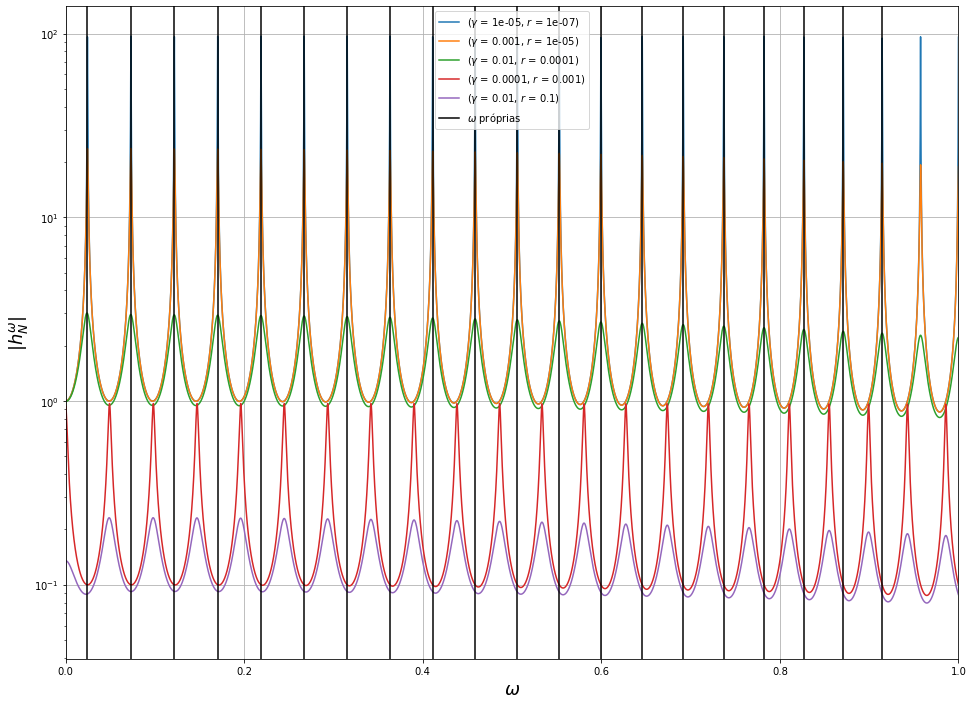

In [7]:
# Responda Aqui


plt.figure(figsize=(16,12))
plt.grid()
plt.xlabel(r"$\omega$", fontsize=18)
plt.ylabel(r"|$h_{N}^{\omega}$|", fontsize=18)

# plot das curvas de h
for pos, ele in enumerate(save_hn):
    plt.plot(w_list, ele, label=r"($\gamma$ = {}, $r$ = {})".format(gamma_r[pos][0], gamma_r[pos][1]))

# linhas verticais
plt.axvline(x = values_64[44], color = "k", label = r"$\omega$ próprias")
for w in values_64[45:]:
    plt.axvline(x = w, color = "k")
    plt.axvline(x = -w, color = "k")

plt.yscale("log")
plt.xlim(0, 1)
plt.legend()
plt.show()

5. Sabendo $h_{n}^{\omega}$ e $F^{\omega}$ podemos reconstruir a resposta temporal no nodo $n$, fazendo a transformada de Fourier inversa de $v_{n}^{\omega}=h_{n}^{\omega}F^{\omega}$. Tome $N = 64$ e o caso em que se injeta um sinal gaussiano da forma,
$$
f(\tau)=\frac{e^{-\frac{(\tau-\tau_{0})^{2}}{2\Delta^{2}}}}{\sqrt{2\pi\Delta^{2}}}\longrightarrow F^{\omega}\!\!=\!\!\int_{-\infty}^{\infty}\!\!\!\!\!\!d\tau f(\tau)e^{-i\omega\tau}=e^{-\frac{1}{2}\Delta^{2}\omega^{2}}e^{-i\tau_{0}\omega}.
$$

[Nota: Não se esqueça que a DFT se relaciona com a transformada de Fourier contínua por um fator
de escala: o inverso do espaçamento de tempos.]

(a) Represente o sinal $f(\tau)$ para vários valores de $\Delta$ e $\tau_{0}$. Interprete estes dois parâmetros de forma concisa.

#Responda Aqui

O $\tau_0$ é responsável por uma deslocação (shift) temporal da função, ou seja, há um deslocamento segundo o eixo dos x. Ver o 1º gráfico.


O $\Delta$ afeta a dissipação de energia e a duração do sinal gaussiano (na verdade o sinal é infinito, mas refiro-me à parte com significado físico). Quanto maior o delta, menor a dissipação e maior a duração do impulso. Ver o 2º gráfico.

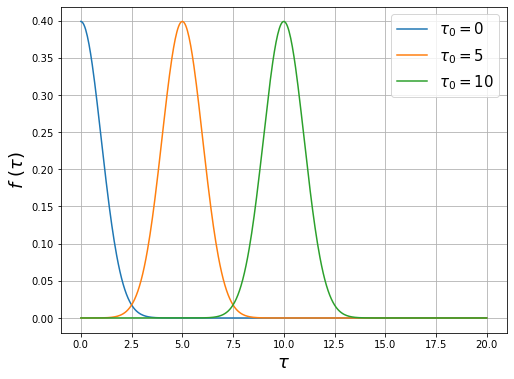

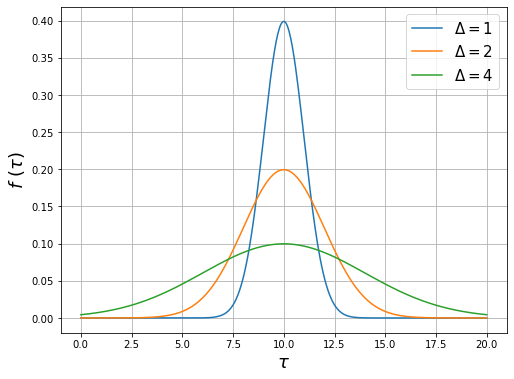

In [8]:
# Responda Aqui

# função gaussiana no domínio do tempo
def f(t, t0, delta):
    sup = np.exp(-1 * (t - t0)**2 / (2 * delta**2))
    inf = np.sqrt(2 * np.pi * delta**2)
    return sup / inf

# para estudar tau0
t_list = np.linspace(0, 20, 500)
plt.figure(figsize=(8,6))
plt.grid()
plt.xlabel(r"$\tau$", fontsize=18)
plt.ylabel(r"$f \ (\tau)$", fontsize=18)
plt.plot(t_list, f(t_list, 0, 1), label = r"$\tau_0 = 0$")
plt.plot(t_list, f(t_list, 5, 1), label = r"$\tau_0 = 5$")
plt.plot(t_list, f(t_list, 10, 1),  label = r"$\tau_0 = 10$")
plt.legend(fontsize=15)
plt.show()

# para estudar delta
plt.figure(figsize=(8,6))
plt.grid()
plt.xlabel(r"$\tau$", fontsize=18)
plt.ylabel(r"$f \ (\tau)$", fontsize=18)
plt.plot(t_list, f(t_list, 10, 1), label = r"$\Delta = 1$")
plt.plot(t_list, f(t_list, 10, 2), label = r"$\Delta = 2$")
plt.plot(t_list, f(t_list, 10, 4), label = r"$\Delta = 4$")
plt.legend(fontsize=15)
plt.show()

(b) Escreva uma função que calcule $v_{n}(\tau)$ através da DFT inversa de $h_{n}^{\omega}F^{\omega}$. Use uma malha uniforme de $\omega$, espaçada de $0.001\pi$ e com um $\omega_{\text{max}}\!=\!30$. Especifique o dominio temporal para o qual $v_{n}(\tau)$ é calculada e o espaçamento entre tempos consecutivos. [Sugestão: Pode usar as rotinas de $\texttt{rfft}$ já implementadas no $\texttt{numpy}$]

#Responda Aqui

O domínio temporal pode ser obtido a partir do domínio das frequências:

$$
d\tau = \frac{\pi}{\omega_{max}} = \frac{\pi}{30} \qquad ; \qquad \tau_{max} = \frac{2 \pi}{d\omega} = \frac{2 \pi}{0.001 \pi}
$$

O valor de $F^\omega \ h_n^\omega$ tem de ser divido por dt, dado que a fórmula apresentada refere-se a uma transformada de fourier contínua, mas a aplicada pelos métodos do numpy é discreta.

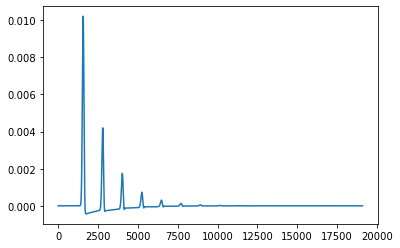

In [41]:
# Responda Aqui

def h(w, gamma, r, n):
        m = m_sparse(w, 64, gamma, r)
        b = np.zeros(64, float)
        b[0] = 1
        h_list = sp.solve_banded((1,1), m, b)
        return h_list[n-1]
h = np.vectorize(h)

# transformada de fourier de gaussiana sem ter em conta a correção por ser discreta
def Fw(w, t0, delta):
    return cm.exp(-0.5 * delta**2 * w**2 - 1j * t0 * w)
Fw = np.vectorize(Fw)

w_list = np.arange(0, 30 + 0.001 * np.pi, 0.001 * np.pi)   # lista com as frequências

# calcula vn no domínio do tempo
def calculate_vn(w, t0, delta, n, gamma, r):
    dt = np.pi / 30   # correção temporal
    aux = Fw(w, t0, delta) * h(w, gamma, r, n) /dt
#    return np.fft.irfft(aux, len(w_list))   # transformada inversa de fourier
    return np.fft.irfft(aux) 

# Teste
N  = 64
g  = 0.01; r  = 0.1
t0 = 100; delta = 5.0
n = N

vt = calculate_vn(w_list, t0, delta, n, g, r)
plt.plot(vt)
plt.show()

(c) Tomando $\Delta\!=\!10$ e $\tau_{0}\!=\!200$, represente $f(\tau)$, $v_{16}(\tau)$, $v_{32}(\tau)$ e $v_{64}(\tau)$ num mesmo gráfico, para os parâmetros $(\gamma,r)\!=\!\{(10^{-3}\!,10^{-2});(10^{-2},10^{-1});$ $(10^{-1},1);(10^{-2},10^{-3})\}$. Descreva qualitativamente o que vê nos diferentes gráficos, não se esquecendo de especificar as unidades de tempo nos gráficos. Nalguns casos, o sistema parece ter uma resposta acausal! Identifique-os e explique a origem do fenómeno.

#Responda Aqui

Análise geral fazendo comparações aos mesmo nodo para valores diferentes de $\gamma$ e $r$:
<ol>
    <li> Nos 1ºs 3 gráficos o valor de $\frac{r}{\gamma}$ é igual mas o valor de $\gamma$ aumenta. É visível que a dissipação de energia aumenta com o aumento de $\gamma$, o que vem de acordo com o que já foi dito sobre associar o amortecimento do circuito ao parâmetro $\gamma$. Esta dissipação de energia é observável porque a resposta "morre" mais cedo com o aumento de $\gamma$.
    <li> Analisando o 2º e o 4º gráficos, estes correspondem a um mesmo $\gamma$, mas a $\frac{r}{\gamma}$ diferentes. Note-se que a resposta tem uma duração semelhante para ambos os casos, o que é mais um argumento a favor. Contudo, é visível no 4º gráfico que acontecem interferências destrutivas e construtivas, o que apoia o facto de para $\frac{r}{\gamma}$>1 acontecem reflexões (condição fronteira de reflexão).
</ol>
    

Análise a para iguais $\gamma$ e $r$, mas diferentes nodos:
<ol>
    <li> Nos 1ºs 3 gráficos é visível que quanto maior o nodo, maior a dissipação de energia. Contudo, também se verifica que para $\gamma$ pequeno obtêm-se picos inicais mais próximos da função de impulso, tal como era de esperar.
    <li> Para o 4º gráfico, este comportamento não é observado. Uma possível justificação é a ocorrência de interferências destrutivas e construtivas nos nodos.
</ol>

<strong>Resposta acausal:</strong>
<ul>
    <li> A resposta parece ser acausal no 1º gráfico, pois a resposta não é nula antes do sinal de entrada (gaussiana).
    <li> Tal é explicado porque uma gaussiana não é uma função periódica. Para fazer uma transformada de fourier de uma função não periódica temos de escolher o intervalo que nos interessa estudar e repeti-lo. Assim, tornamos a nossa função periódica. O problema reside aqui, pois ao fazer isto consideramos que existiu um impulso (gaussiana) anterior ao intervalo que estamos a analisar. Para o 1º gráfico a dissipação não é grande o suficiente para eliminar o sinal, então dá a entender que o sinal começa antes do impulso. Para evitar este comportamento, deve-se escolher um intervalo de modo a que a função relaxe para 0.
    <li> Contudo, para os restantes gráficos a dissipação é grande o suficiente para não evidenciar esta característica das transformadas de fourier.
</ul>

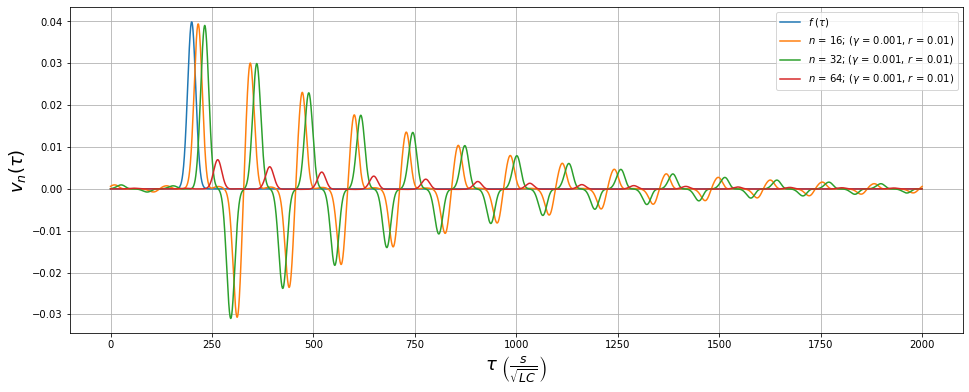

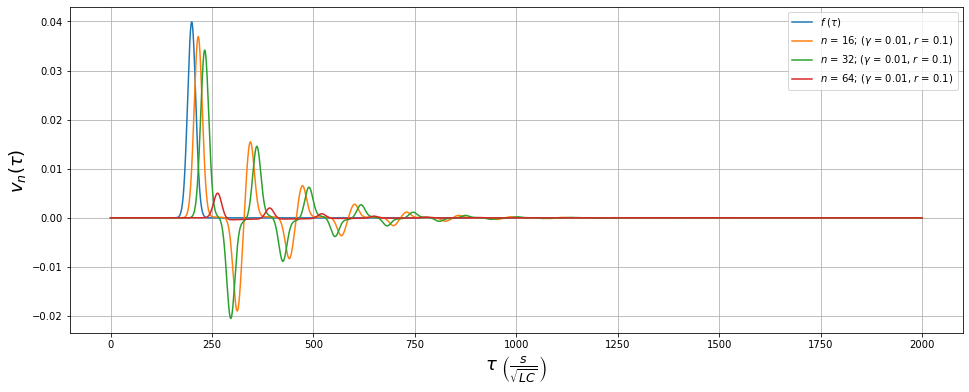

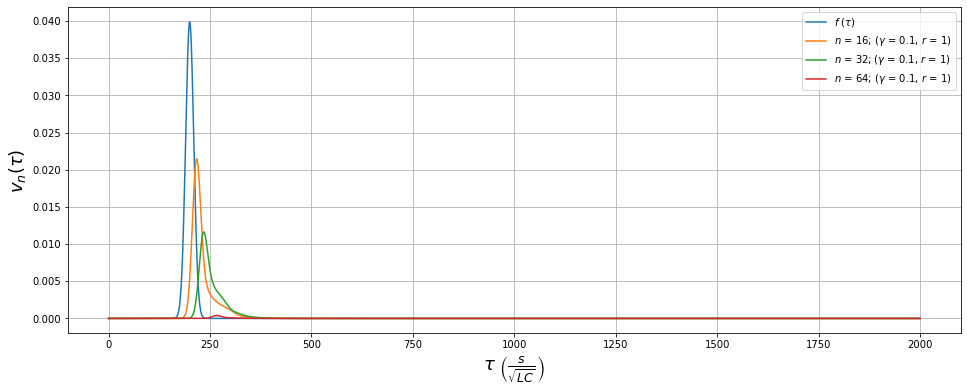

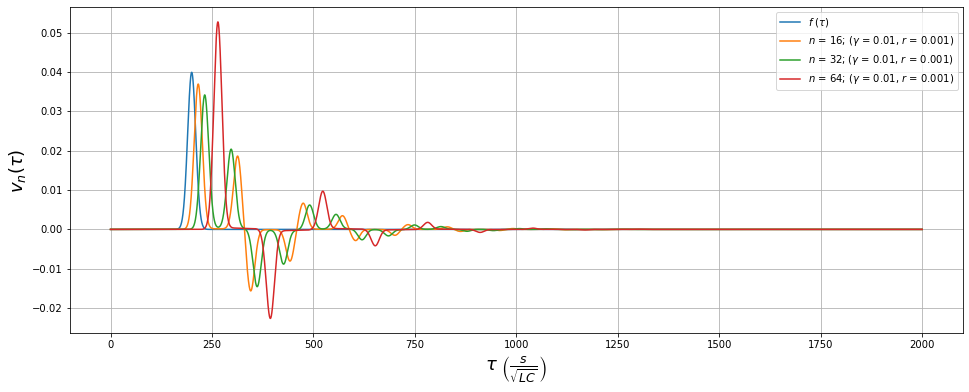

In [42]:
# Responda Aqui

gamma_r = [(1e-3, 1e-2), (1e-2, 0.1), (0.1, 1), (1e-2, 1e-3)]   # lista com os valores de gamma e r
dt = np.pi / 30   # intervalo no domínio do tempo
t_max = 2 * np.pi / (0.001 * np.pi)   # valor máximo de t
t_list = np.arange(0, t_max + dt, dt)   # lista com os t's

# dar plot aos gráficos
for ele in gamma_r:   # percorrer todos os pares gamma e r
    plt.figure(figsize=(16,6))
    plt.grid(b=True)
    plt.xlabel(r"$\tau$ $\left( \frac{s}{\sqrt{LC}} \right)$", fontsize=18)
    plt.ylabel(r"$v_n(\tau)$", fontsize=18)
    plt.plot(t_list, f(t_list, 200, 10), label = r"$f \ (\tau)$")
    for n in np.array([16, 32, 64]):   # percorrer todos os n's
        plt.plot(t_list, calculate_vn(w_list, 200, 10, n, ele[0], ele[1]), label=r"$n$ = {}; ($\gamma$ = {}, $r$ = {})".format(n, ele[0], ele[1]))
    plt.legend()

(d) Usando $\gamma=0.005$ e $r=0.02$ represente $v_{64}(\tau)$ para $\Delta\!=\!1,10,40$ ($\tau_{0}\!=\!200$). Quais as diferenças? Interprete os resultados pensando no efeito que uma redução na duração do sinal entrada tem no espectro da resposta.

#Responda Aqui

Quanto maior o $\Delta$, maior o período e menor a amplitude (energia da resposta). Isto faz sentido, dado que um maior $\Delta$ implica estas características na função de entrada (gaussiana).

Uma outra análise é considerar que uma redução na duração do sinal de entrada provoca um aumento das frequências no espetro da resposta. Assim, ao fazermos a a transformada de fourier inversa do mesmo, obtemos que o domínio do tempo da resposta é reduzido. Isto advém da ortogonalidade do domínio das frequências e do domínio do tempo.

Assim, é justificável que a resposta tenha uma maior frequência para entradas com $\Delta$ pequeno. 

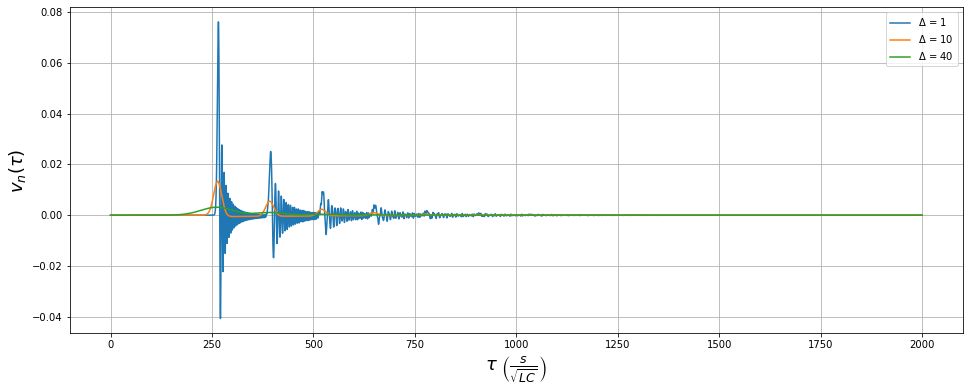

In [11]:
# Responda Aqui

plt.figure(figsize=(16,6))
plt.grid()
plt.xlabel(r"$\tau$ $\left( \frac{s}{\sqrt{LC}} \right)$", fontsize=18)
plt.ylabel(r"$v_n(\tau)$", fontsize=18)
for delta in np.array([1, 10, 40]):   # percorrer os delta's
    plt.plot(t_list, calculate_vn(w_list, 200, delta, 64, 0.005, 0.02), label=r"$\Delta$ = {}".format(delta))
plt.legend()
plt.show()

6. A resistência de carga ($R_{\text{L}}$) representa um receptor do sinal introduzido na linha de transmissão. Calcule e represente a potência dissipada, por unidade de tempo, considerando $\Delta\!=\!10$, $\tau_{0}\!=\!200$, $\gamma=0.005$ e $r=0.01$. Como calcularia a energia total dissipada em $R_{\text{L}}$?

#Responda Aqui

A potência é dada por:
$$  
P = \frac{V^2}{R_L} 
$$
<br>
Consiserando $p = \frac {P}{P_0}$:
$$
p = v^2
$$
<br>
Como a diferença de potencial nos terminais da resistência $R_L$ é $v_N$, a potência dissipada em $R_L$ é:
$$
p_{R_L} = v_N^2(\tau)
$$
<br>
A Energia, já adimensionalizada, podia ser calculada fazendo o integral em ordem ao tempo de $p_{R_L}$, ou seja:
$$
E(\tau) = \int_{0}^{t_{max}} v_N^2(\tau) \ d\tau
$$

Esta integração pode ser realizada por um método com espaçamento sempre igual. Assim, a quadratura gaussiana é excluída. Também não vejo vantagens na aplicação do método de romberg para este caso. Ficamos entre simpson e o trapézio. Fiz pelos 2 métodos e ambos deram o mesmo resultado até 15 algarismos significativos.

Nota: se as funções do scipy não funcionarem tentar simpson e trapezoid. Versões atualizadas que não funcionam no meu computador.

Regra de simpson: E = 0.009132405151400923
Regra do trapézio: E = 0.009132405151400924


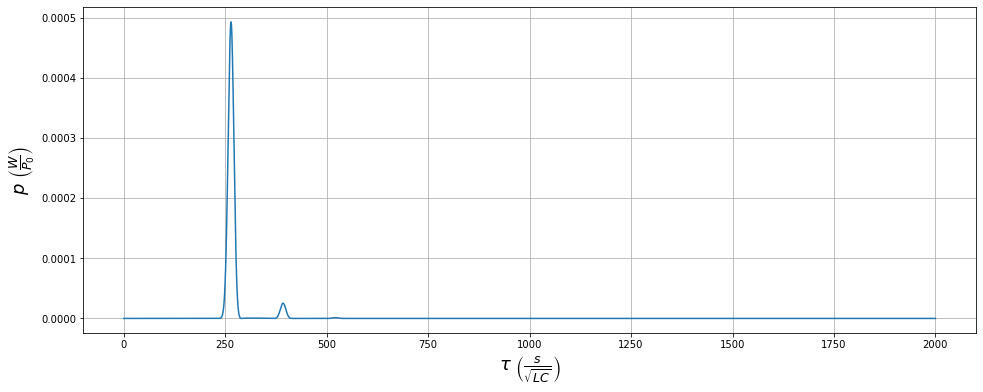

In [12]:
# Responda Aqui
P = calculate_vn(w_list, 200, 10, 64, 0.005, 0.01)**2


E = integrate.simps(P, t_list)
print("Regra de simpson: E = {}".format(E))
E = integrate.trapz(P, t_list)
print("Regra do trapézio: E = {}".format(E))

plt.figure(figsize=(16,6))
plt.plot(t_list, P)   # plot da potência em função do tempo
plt.grid()
plt.xlabel(r"$\tau$ $\left( \frac{s}{\sqrt{LC}} \right)$", fontsize=18)
plt.ylabel(r"$v_n$", fontsize=18)
plt.ylabel(r"$p \ \left( \frac{W}{P_0} \right)$", fontsize=18)
plt.show()

# 2. Exercício - Análise no Domínio Temporal

Agora vamos analisar a linha de transmissão usando métodos de espaço temporal. Considere o sistema de equações diferenciais lineares definido em 1.1 (já na sua forma adimensional). 

1. Escreva as equações na forma $\frac{d}{d\tau}\mathbf{y}=f\left(\mathbf{y}(\tau),\tau\right)$ onde $\mathbf{y}(\tau)$ é um vector $2N$ dimensional e implemente a função $f\left(\mathbf{y(\tau)},\tau\right)$ no $\texttt{Python}$. [Nota: Como se trata de um sistema linear forçado $f$ é uma função afim da forma, $f\left(\mathbf{y}(\tau),\tau\right)\!=\!\mathbb{C}\!\cdot\!\mathbf{y}(\tau)+\mathbf{b}(\tau)$, onde $\mathbb{C}$ é uma matriz constante.]


#Responda Aqui

As equações podem ser escritas da seguinte forma:
$$
\begin{cases} \frac{d}{d \tau} y_1(\tau) = f(\tau)-\gamma y_1(\tau)-2v_1(\tau)+v_2(\tau)\\ y_1(\tau) = \frac{d}{d\tau}v_1(\tau)\end{cases}
$$

$$
\begin{cases} \frac{d}{d \tau} y_n(\tau) = -\gamma y_n(\tau)-2v_n(\tau)+v_{n+1}(\tau) +v_{n-1}(\tau)\\ y_n(\tau) = \frac{d}{d\tau}v_n(\tau)\end{cases} \qquad \qquad 1<n<N
$$

$$
\begin{cases} \frac{d}{d \tau} y_N(\tau) = -(\gamma + \frac{r}{\gamma}) y_N(\tau)-(1+r)v_n(\tau)+v_{N-1}(\tau)\\ y_N(\tau) = \frac{d}{d\tau}v_N(\tau)\end{cases}
$$

Tome-se o exemplo para 4 nodos:
$$
\frac{d}{d \tau} \begin{bmatrix} v_1 \\ y_1 \\ v_2 \\ y_2 \\ v_3 \\ y_3 \\ v_4 \\ y_4 \end{bmatrix} = \begin{bmatrix} 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ -2 & -\gamma & 1 & 0 & 0 & 0 & 0 & 0 \\  0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 1 & 0 & -2 & -\gamma & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 & -2 & -\gamma & 1 & 0 \\  0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 1 & 0 & -(1+r) & -(\frac{r}{\gamma} + r) \end{bmatrix} \begin{bmatrix} v_1 \\ y_1 \\ v_2 \\ y_2 \\ v_3 \\ y_3 \\ v_4 \\ y_4 \end{bmatrix} +\begin{bmatrix} 0 \\ f(\tau) \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$

In [13]:
# Responda Aqui

# define a matriz c fora da função para eficiência
def matrix_c(gamma, r, n):
    c = np.eye(n, n, 1)
    aux = np.arange(1, n - 2, 2)
    aux2 = np.arange(0, n - 3, 2)
    c[aux, aux] = - gamma
    c[-1, -1] = -(r / gamma + gamma)
    c[aux2 + 1, aux2] = -2
    c[-1, -2] = -(1 + r)
    c[aux2 + 3, aux2] = 1
    
    return c

# tentativa de multiplicação em banda. é bem mais lenta
# aux = np.empty(128)
# def f_y_t(y, t, c, t0=200, delta=5):
#     n = len(y)
#     aux[0:-1:2] = y[1:n:2]
#     aux[-1] = np.dot(c[-1, -4:] , y[-4:])
#     aux[1] = np.dot(c[1, :3], y[:3]) + f(t ,t0, delta)
#     for i in range(3, n-2, 2):
#         aux[i] = np.dot(c[i, i-3:i+2], y[i-3:i+2])
#     return aux


def f_y_t(y, t, c, t0=200, delta=5):
    res = c @ y
    res[1] += f(t, t0, delta)
    return res
    

2. Implemente uma rotina de Runge-Kutta de 4ª ordem para integrar este sistema de equações diferenciais, dado um vector inicial $\mathbf{y}_{\!0}=\mathbf{y}(\tau\!=\!0)$. Nas seguintes alíneas considere sempre que $\mathbf{y}_{\!0}=[0,\cdots,0]$ e $N =64$.

(a) Considere que a função $f\!\left(\tau\right)$ é o impulso gaussiano da alínea 5 do exercício 1. Usando uma lista de tempos uniforme entre 0 e 2000, calcule $v_{64}\left(\tau\right)$ com $\Delta\!=\!5$, $\tau_{0}\!=\!200$, $N\!=\!64$, $\gamma\!=\!0.01$, $r\!=\!0.1$ com o método da alínea anterior. Estime o número de pontos temporais necessário para que $v_{64}\!\left(\tau\right)$ esteja completamente convergido.

#Responda Aqui

O número de pontos necessários para este integral convergir é $\approx$ 8000. Este número foi obtido através de começar com um número pequeno de pontos e ir aumentando até verificar que o programa não dava erro. De seguida analisei o aspeto para um grande número de pontos (100 000) e anlisei se os gráficos eram idênticos.

In [14]:
# Responda Aqui

def runge_kutta(i, n, t_max=2000, gamma=0.01, r=0.1):
    h = t_max / (i - 1)
    y = np.zeros(n * 2, float)   # condição inicial y0
    t_points = np.linspace(0, t_max, i)   # array com os tempos
    y_points = np.empty([i, n * 2], float)    # criar array para armazenar os valores do vetor y
    c = matrix_c(gamma, r, 2 * n)   # definir a matriz c

    for pos, t in enumerate(t_points):   # indice e tempo, respetivamente
        y_points[pos, :] = y
        k1 = h * f_y_t(y, t, c)
        k2 = h * f_y_t(y + 0.5 * k1, t + 0.5 * h, c)
        k3 = h * f_y_t(y + 0.5 * k2, t + 0.5 * h, c)
        k4 = h * f_y_t(y + k3, t + h, c)
        y += (k1 + 2 * (k2 + k3) + k4) / 6

    return t_points, y_points


t_list1, v = runge_kutta(8000, 64)

(b) Represente $f\!\left(\tau\right)$ e $v_{n}\!\left(\tau\right)$ para $n=1,8,16,32$ e $64$ no mesmo gráfico, calculados com os parâmetros anteriores.

#Responda Aqui

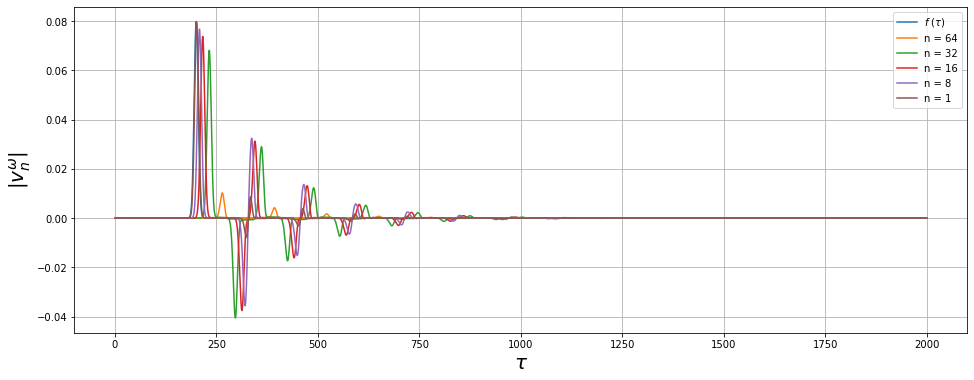

In [15]:
# Responda Aqui

plt.figure(figsize=(16, 6))
plt.grid()
plt.plot(t_list1, f(t_list1, 200, 5), label = r"$f \ (\tau)$")   # função f
plt.plot(t_list1, v[:, -2], label="n = 64")   # v64
plt.plot(t_list1, v[:, 62], label="n = 32")   # v32
plt.plot(t_list1, v[:, 30], label="n = 16")   # v16
plt.plot(t_list1, v[:, 14], label="n = 8")    # v8
plt.plot(t_list1, v[:, 0], label="n = 1")     # v1
plt.legend()
plt.xlabel(r"$\tau$", fontsize=20)
plt.ylabel(r"|$v_n^{\omega}$|", fontsize=20)
plt.show()

(c) Use uma rotina FFT (real) para calcular $v_{64}^{\omega}$ e compare com o que obteve na alínea 4a do exercício 1. Deverá obter a mesma resposta. 

#Responda Aqui

É visível no gráfico que ambas os resultados coincidem, ou seja, temos a mesma resposta.

(0.0, 1.0)

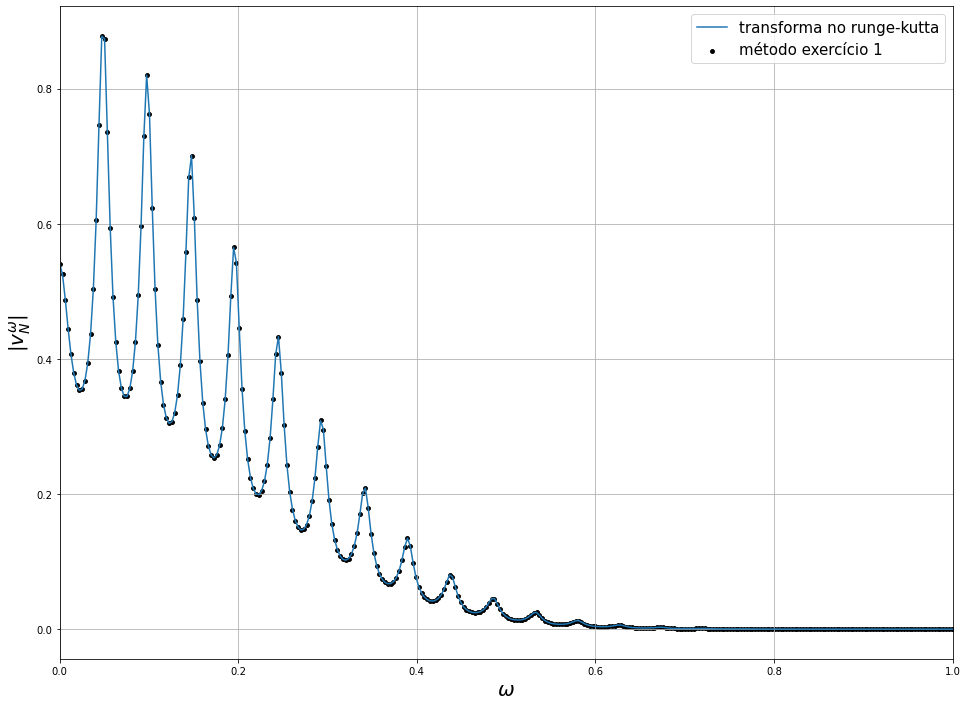

In [16]:
# Responda Aqui

t_list2, v2000 = runge_kutta(8000, 64)   # lista dos tempos e v(tau)
dt = t_list2[1] - t_list2[0]   # intervalo de tempo
dw = 2 * np.pi / t_list2[-1]   # intervalo no domínio das frequências
w_max = 2 * np.pi / (t_list2[1] - t_list2[0])   # frequência máxima
w_list1 = np.arange(0, w_max / 2 + dw, dw)   # lista de frequências

v64_w = np.fft.rfft(v2000[:, -2])   # transformada de fourier de v(tau), v_N^w

Fw_list = Fw(w_list1, 200, 5)   # transformada de fourier da gaussiana
hw_list = h(w_list1, 0.01, 0.1, 64)   # função transferência


plt.figure(figsize=(16, 12)) 
plt.plot(w_list1, abs(v64_w), label="transforma no runge-kutta")   # plot de |v_N^w| segundo o de runge_kutta
plt.scatter(w_list1, abs(hw_list * Fw_list) / dt, s=15, color="k", label="método exercício 1")   # plot de |v_N^w| segundo a função de transferência
plt.grid()
plt.legend(fontsize = 15)
plt.xlabel(r"$\omega$", fontsize=20)
plt.ylabel(r"|$v_N^{\omega}$|", fontsize=20)
plt.xlim(0, 1)

(d) Repita a comparação da alínea anterior usando $\gamma=0.003$ e $r=0.5$. Como explica a diferença?

[Sugestão: As diferenças envolvidas são um pequeno efeito. É útil representar a diferença entre as duas transformadas de Fourier, em vez de sobrepôr os gráficos.]

Bom Trabalho

#Responda Aqui

Neste gráfico os 2 resultados já não são totalmente coincidentes. Enquanto que a forma geral dos dois é idêntica, existem desvios, os quais podem ser melhor observados no 2º gráfico.

Isto acontece porque ao calcularmos a transformada de fourier pelo método do exercício 1 assumimos que a função de entrada é periódica. Isto não daria problemas se a resposta relaxasse para 0 no intervalo de tempo estipulado, contudo como isto não acontece, verifica-se o comportamento acausal discutido no exercício 1.

Contudo, pelo método de runge_kutter isto não acontece dado que não se assume que a função de entrada é periódica, sendo o valor da resposta 0 antes do impulso (gaussiana).

Assim, é de esperar que as transformadas de fourier não sejam iguais, como se verifica pelos desvios.

Conclui-se que diminuir os intervalos de tempo no método de runge_kutter não diminui o erro.

Note-se que isto não acontece no de cima porque o $\gamma$ é maior, ou seja, há uma maior dissipação o que diminui (ou elimina mesmo) o efeito de acausalidade.


(0.0, 1.0)

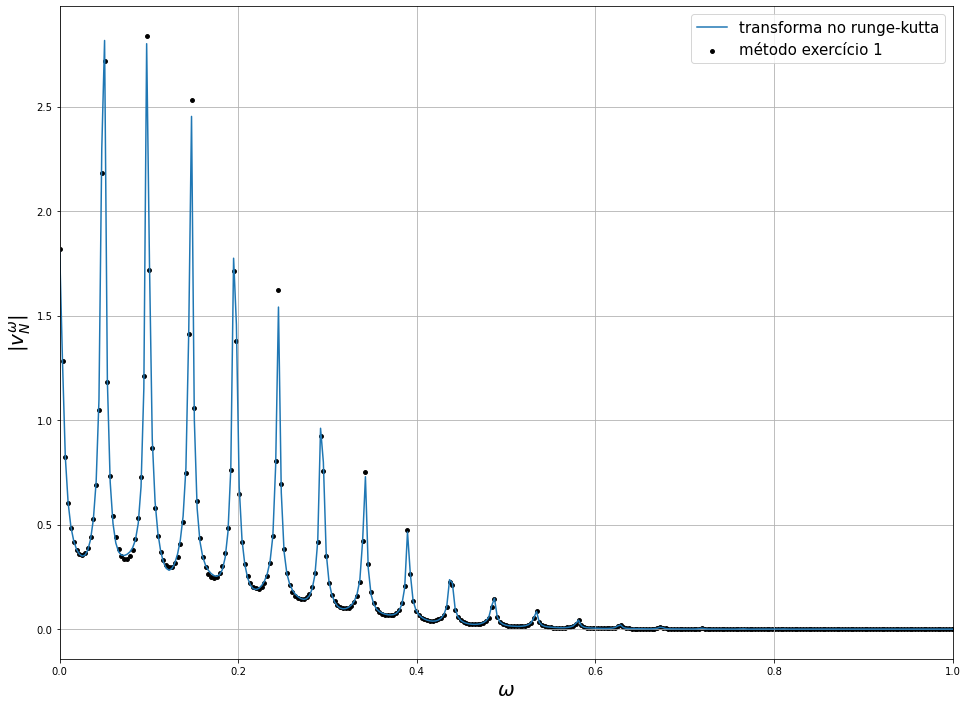

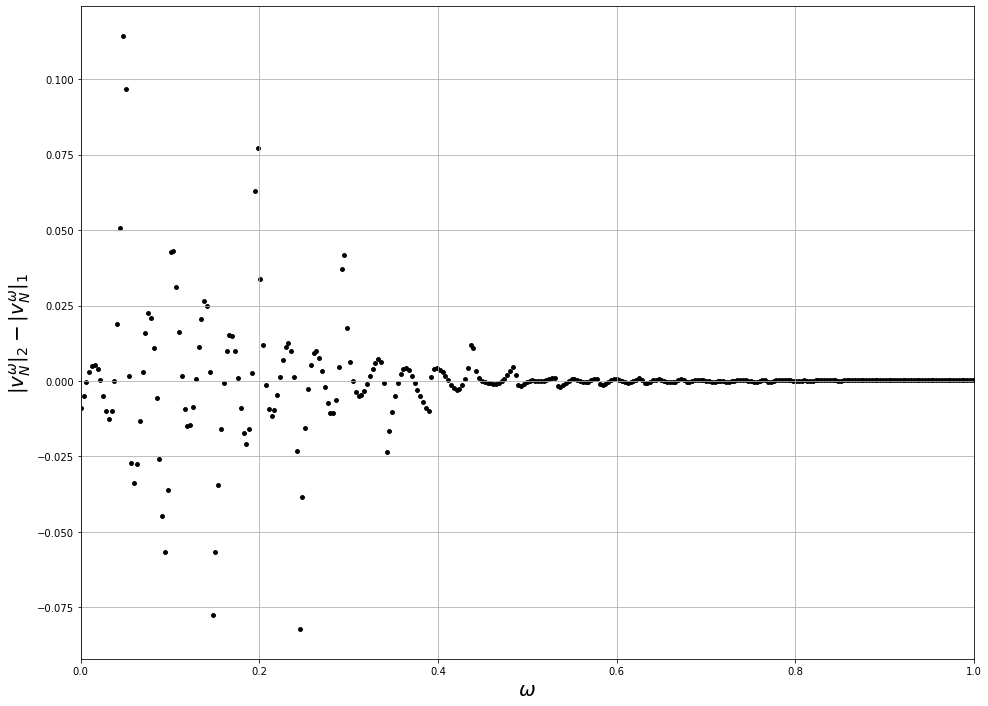

In [17]:
# Responda Aqui

# ver comentários alínea anterior
t_list3, v2000 = runge_kutta(120000, 64, 2000, 0.003, 0.5)
dw2 = 2 * np.pi / t_list3[-1]
w_max2 = 2 * np.pi / (t_list3[1] - t_list3[0])
w_list2 = np.arange(0, w_max2 / 2 + dw2, dw2)

v64_w2 = np.fft.rfft(v2000[:, -2]) 

Fw_list2 = Fw(w_list2, 200, 5)
hw_list2 = h(w_list2, 0.003, 0.5, 64)


plt.figure(figsize=(16, 12)) 
plt.plot(w_list2, abs(v64_w2), label="transforma no runge-kutta")
plt.scatter(w_list2, abs(hw_list2 * Fw_list2) / (t_list3[1] - t_list3[0]), s=15, color="k", label="método exercício 1")
plt.grid()
plt.legend(fontsize = 15)
plt.xlabel(r"$\omega$", fontsize=20)
plt.ylabel(r"|$v_N^{\omega}$|", fontsize=20)
plt.xlim(0, 1)

# plot das diferenças entre os |v_N^w|
plt.figure(figsize=(16, 12)) 
plt.scatter(w_list2, abs(v64_w2) - abs(hw_list2 * Fw_list2) / (t_list3[1] - t_list3[0]), s=15, color="k")
plt.xlabel(r"$\omega$", fontsize=20)
plt.ylabel(r"$|v_N^{\omega}|_2 - |v_N^{\omega}|_1$", fontsize=20)
plt.grid()
plt.xlim(0, 1)